In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kaon_pn_4GeV_Jul13_nobias_ntuple.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
hists = {}

hists["hist_dau1_pdgID"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"PDG ID", 30, -230, 400)
                            )
hists["hist_dau1_ke"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 50, 0, 1500)
                            )
hists["hist_dau1_ke_40"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 50, 0, 1500)
                            )

hists["hist_dau2_pdgID"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"PDG ID", 30, -230, 400)
                            )
hists["hist_dau2_ke"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 50, 0, 1500)
                            )
hists["hist_dau2_ke_40"] = hist.Hist("Sim Kaon",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 50, 0, 1500)
                            )

hists["hist_rec_mass"] = hist.Hist("Sim Kaon",
                                hist.Bin("e", r"Reconstructed Mass [MeV]", 50, 425, 600)
                            )
hists["hist_rec_mass_40"] = hist.Hist("Sim Kaon",
                                hist.Bin("e", r"Reconstructed Mass [MeV]", 50, 425, 600)
                            )

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_Kaon']
    #sim_particle_n = ldmx_events['n']['Sim_Particle']
    sim_particle_dau1 = ldmx_events['Sim_Kaon_dau1']
    sim_particle_dau2 = ldmx_events['Sim_Kaon_dau2']
    
    
    masks_id = {#'Kplus': 321,
                #'Kshort': 310,
                #'Klong': 130,
                #'Kminus': -321,
                #'Electron': 11,
                #'NuE': 13,
                #'NuMuplus': 14,
                #'NuMuminus': -14,
                #'NuMuplus': 12,
                #'NuMuminus': -12,
                'Piplus': 211,
                #'Pi0': 111,
                'Piminus': -211,
                #'Muminus': 13,
                #'Muplus': -13,
                #'Proton':2212,
                #'Neutron':2112,
               }
    masses = {#'Kplus': 493.677,
              #'Kshort': 493.677,
              #'Klong': 493.677,
              #'Kminus': 493.677,
              #'Electron': 0.51099895,
              #'NuE': 0,
              #'NuMuplus': 0,
              #'NuMuminus': 0,
              #'NuEplus': 0,
              #'NuEminus': 0,
              'Piplus': 139.57039,
              #'Pi0': 134.9768,
              'Piminus': 139.57039,
              #'Muminus': 105.658,
              #'Muplus': 105.658,
              #'Proton': 939.565,
              #'Neutron': 939.565,
              }

    dau1 = get_vector(sim_particle_dau1)#[decay1_mask])
    dau2 = get_vector(sim_particle_dau2)#[decay2_mask])
    
    dau1_vector = get_vector(sim_particle_dau1)
    dau2_vector = get_vector(sim_particle_dau2)
    dausum = dau1_vector + dau2_vector
    
    theta_mask1 = dau1_vector.theta*180/math.pi <= 40
    theta_mask2 = dau2_vector.theta*180/math.pi <= 40
    
    #print(flat(sim_particle_dau1).shape,flat(sim_particle_dau1[theta_mask1]).shape, flat(sim_particle_dau1[theta_mask1 & theta_mask2]).shape )
    #print(flat(sim_particle_dau1).shape,flat(sim_particle_dau2[theta_mask2]).shape, flat(sim_particle_dau2[theta_mask1 & theta_mask2]).shape )
    #print(flat(sim_particle_dau2[theta_mask1 & theta_mask2].pdgID))
    
    for part,pmask in masks_id.items():
        part_mask1a = (sim_particle_dau1.pdgID == pmask)
        part_mask1b = (sim_particle_dau1[theta_mask1 & theta_mask2].pdgID == pmask)
        hists["hist_dau1_pdgID"].fill(Ptype= part,
                                     e=flat(sim_particle_dau1.pdgID[part_mask1a]),
                                     )  
        hists["hist_dau1_ke"].fill(Ptype= part,
                                     e=flat(dau1_vector.t[part_mask1a]) - masses[part],
                                     )   
        hists["hist_dau1_ke_40"].fill(Ptype= part,
                                     e=flat(dau1_vector[theta_mask1 & theta_mask2].t[part_mask1b]) - masses[part],
                                     )
        part_mask2a = (sim_particle_dau2.pdgID == pmask)
        part_mask2b = (sim_particle_dau2[theta_mask1 & theta_mask2].pdgID == pmask)
        hists["hist_dau2_pdgID"].fill(Ptype= part,
                                     e=flat(sim_particle_dau2.pdgID[part_mask2a]),
                                     )  
        hists["hist_dau2_ke"].fill(Ptype= part,
                                     e=flat(dau2_vector.t[part_mask2a]) - masses[part],
                                     )   
        hists["hist_dau2_ke_40"].fill(Ptype= part,
                                     e=flat(dau2_vector[theta_mask1 & theta_mask2].t[part_mask2b]) - masses[part],
                                     )
        
    hists["hist_rec_mass"].fill(
                                e=flat(dausum.mass),
                                )                        
    hists["hist_rec_mass_40"].fill(
                                e=flat(dausum[theta_mask1 & theta_mask2].mass),
                                )      
    
    dau1_count = 0
    dau2_count = 0
    dau1_count_40 = 0
    dau2_count_40 = 0
    piplus_count = 0
    piminus_count = 0
    piplus_count_40 = 0
    piminus_count_40 = 0
    
    for element in sim_particle_dau1.pdgID:
        for part in element:
            dau1_count = dau1_count +1
            if part == 211:
                piplus_count = piplus_count +1 
            if part == -211:
                piminus_count = piminus_count +1          
    for element in sim_particle_dau2.pdgID:
        for part in element:
            dau2_count = dau2_count +1
            if part == 211:
                piplus_count = piplus_count +1 
            if part == -211:
                piminus_count = piminus_count +1
                
    for element in sim_particle_dau1[theta_mask1 & theta_mask2].pdgID:
        for part in element:
            dau1_count_40 = dau1_count_40 +1
            if part == 211:
                piplus_count_40 = piplus_count_40 +1 
            if part == -211:
                piminus_count_40 = piminus_count_40 +1          
    for element in sim_particle_dau2[theta_mask1 & theta_mask2].pdgID:
        for part in element:
            dau2_count_40 = dau2_count_40 +1
            if part == 211:
                piplus_count_40 = piplus_count_40 +1 
            if part == -211:
                piminus_count_40 = piminus_count_40 +1  
    print('All Dau:')            
    print('Total Dau: ',dau1_count+dau2_count, ', Dau1 Count: ', dau1_count, ', Dau2 Count: ', dau2_count)            
    print('Piplus Count: ', piplus_count, ', Piminus Count: ', piminus_count)
    print('')
    print(r'All Dau with theta_{dau1,dau2}< 40:')  
    print('Total Dau: ',dau1_count_40+dau2_count_40, ', Dau1 Count: ', dau1_count_40, ', Dau2 Count: ', dau2_count_40)            
    print('Piplus Count: ', piplus_count_40, ', Piminus Count: ', piminus_count_40)
    print('')
    print('Total Dau Acceptance: ', (dau1_count_40+dau2_count_40)/(dau1_count+dau2_count))
    

In [6]:
nchunk = 0
for chunk in ldmx_dict:
    nchunk += 1
    print('process',nchunk)
    ProcessChunk(chunk, hists)

process 1
All Dau:
Total Dau:  112 , Dau1 Count:  56 , Dau2 Count:  56
Piplus Count:  56 , Piminus Count:  56

All Dau with theta_{dau1,dau2}< 40:
Total Dau:  22 , Dau1 Count:  11 , Dau2 Count:  11
Piplus Count:  11 , Piminus Count:  11

Total Dau Acceptance:  0.19642857142857142


<Hist (Ptype,e) instance at 0x128329df0>
<Hist (e) instance at 0x1282b6df0>


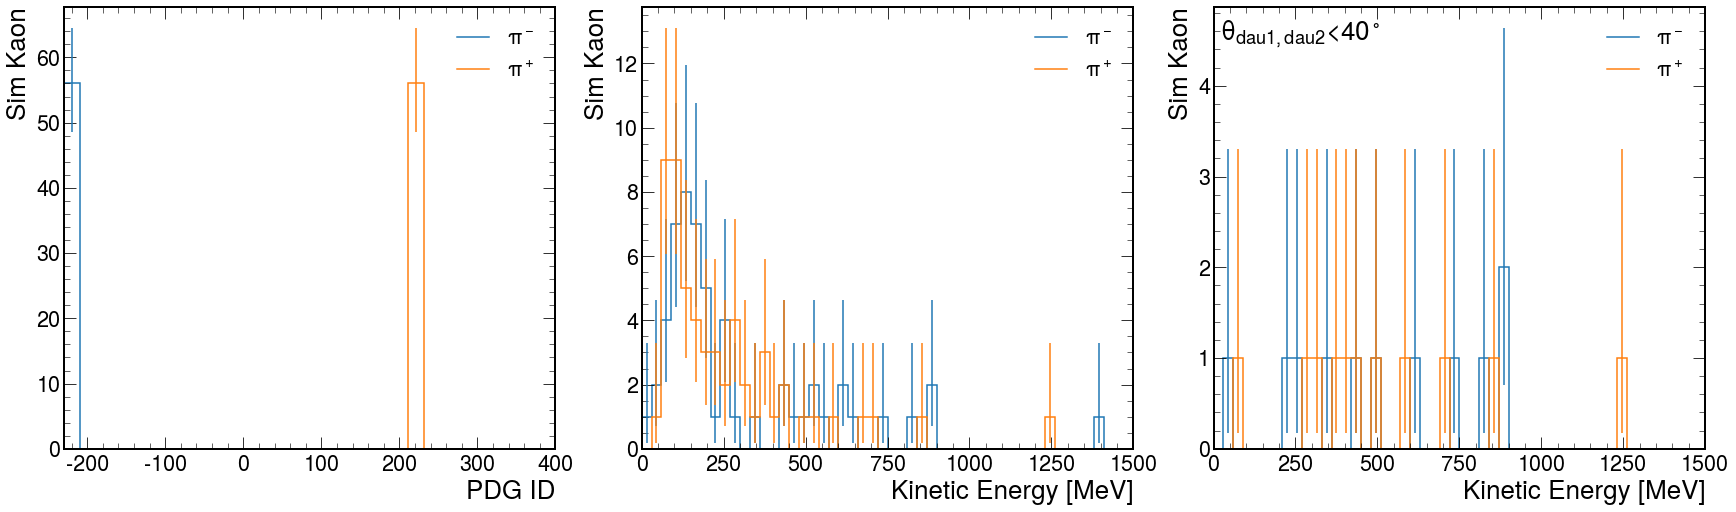

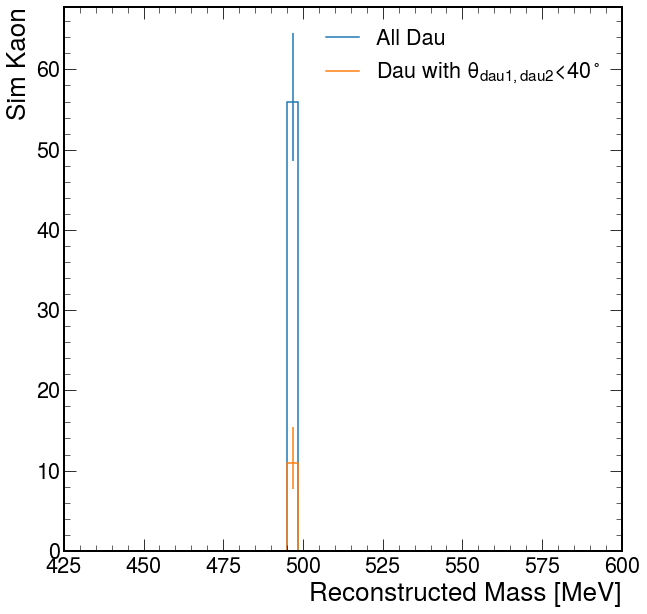

In [7]:
#48 kminus
print(hists["hist_dau1_pdgID"])
fig, ax = plt.subplots(1,3, figsize=(24,7), constrained_layout=True)
hist.plot1d(hists["hist_dau1_pdgID"]+hists["hist_dau2_pdgID"],ax=ax[0],clear=False);
leg = ax[0].legend([r'$\pi ^-$', r'$\pi ^+$'])

hist.plot1d(hists["hist_dau1_ke"]+hists["hist_dau2_ke"],ax=ax[1],clear=False);
leg = ax[1].legend([r'$\pi ^-$', r'$\pi ^+$'])

hist.plot1d(hists["hist_dau1_ke_40"]+hists["hist_dau2_ke_40"],ax=ax[2],clear=False);
leg = ax[2].legend([r'$\pi ^-$', r'$\pi ^+$'])
ax[2].text(20, 4.5, r'$\theta_{dau1, dau2}$<40$^\circ$')

print(hists["hist_rec_mass"])
fig, ax = plt.subplots()
hist.plot1d(hists["hist_rec_mass"],ax=ax,clear=False);
hist.plot1d(hists["hist_rec_mass_40"],ax=ax,clear=False);
leg = ax.legend([r'All Dau', r'Dau with $\theta_{dau1, dau2}$<40$^\circ$'])





